In [1]:
#Question 1
import pandas as pd

dataset = pd.read_csv('dataset.csv')

#Basic information.
print("Shape of Dataset:", dataset.shape)
print(dataset.dtypes)
print(dataset.isnull().sum())

#Summary Statistics
print(dataset.describe())

#min/max
cols = ["budget_million", "box_office_million", "views_million", "critic_score", "audience_score"]
print(dataset[cols].agg(["min", "max"]))

print(dataset.groupby("genre")[["box_office_million", "views_million"]]
      .mean()
      .sort_values("box_office_million", ascending=False)
      .head(5))

#pre and post 2020
pre_2020 =  dataset[dataset["release_year"] < 2020]
post_2020 = dataset[dataset["release_year"] >= 2020]
print(len(pre_2020))
print(len(post_2020))
print(pre_2020["box_office_million"].mean())
print(post_2020["box_office_million"].mean())

corr = dataset[["budget_million", "box_office_million", "views_million", "critic_score"]].corr()
print(corr)

region_revenue = dataset.groupby("region")["box_office_million"].sum().sort_values(ascending=False)
region_audience = dataset.groupby("region")["audience_score"].mean().sort_values(ascending=False)
print(region_revenue)
print(region_audience)




Shape of Dataset: (1000, 11)
movie_id                int64
title                  object
platform               object
genre                  object
release_year            int64
budget_million        float64
box_office_million    float64
critic_score            int64
audience_score        float64
views_million         float64
region                 object
dtype: object
          movie_id  release_year  budget_million  box_office_million  \
count  1000.000000   1000.000000     1000.000000         1000.000000   
mean    500.500000   2007.530000      150.757360          492.078620   
std     288.819436     10.278168       86.820721          286.474078   
min       1.000000   1990.000000        1.000000            1.150000   
25%     250.750000   1999.000000       81.672500          240.315000   
50%     500.500000   2008.000000      149.965000          486.955000   
75%     750.250000   2016.000000      225.547500          741.922500   
max    1000.000000   2025.000000      299.350000   

R² Score: 0.0033
Intercept         492.078620
budget_million     -3.746950
critic_score       15.311193
audience_score      1.251041
views_million       4.799495
dtype: float64


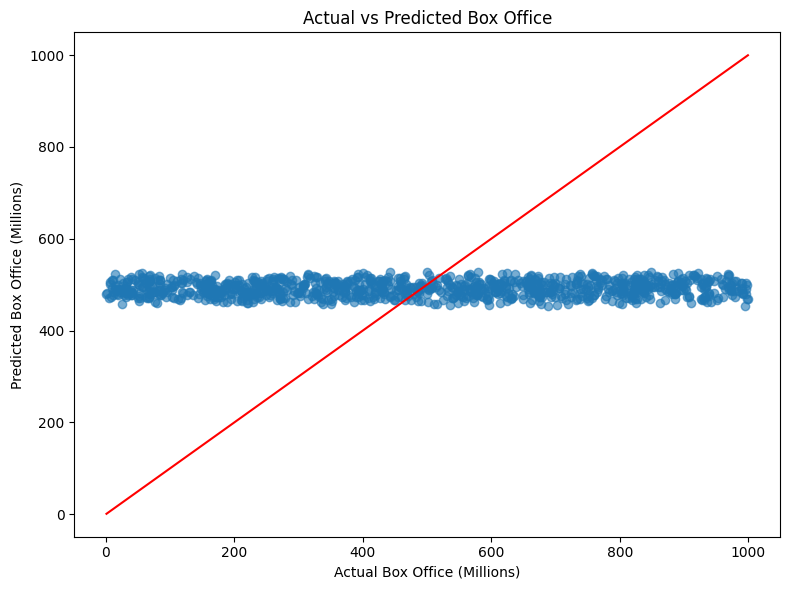


Top Genres by Profit Margin:
 genre
Action         1400.438917
Drama          1349.507096
Comedy         1345.892216
Thriller        871.985264
Sci-Fi          814.792321
Romance         769.006397
Documentary     674.430348
Name: profit_margin, dtype: float64

Top Platforms by Profit Margin:
 platform
Disney+    2127.311834
Netflix    1286.476197
Hulu       1029.148938
HBO         748.851971
Theater     573.377760
Prime       487.460927
Name: profit_margin, dtype: float64


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("dataset.csv")
dataset["profit_margin"] = (dataset["box_office_million"] - dataset["budget_million"]) / dataset["budget_million"] * 100

X = dataset[["budget_million", "critic_score", "audience_score", "views_million"]].values
y = dataset["box_office_million"].values.reshape(-1, 1)

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

theta = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y
y_pred = X_scaled @ theta

ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2 = 1 - ss_res / ss_tot
print("R² Score:", round(r2, 4))

coefficients = pd.Series(theta.flatten(), index=["Intercept", "budget_million", "critic_score", "audience_score", "views_million"])
print(coefficients)

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual Box Office (Millions)")
plt.ylabel("Predicted Box Office (Millions)")
plt.title("Actual vs Predicted Box Office")
plt.tight_layout()
plt.show()

genre_profit = dataset.groupby("genre")["profit_margin"].mean().sort_values(ascending=False)
platform_profit = dataset.groupby("platform")["profit_margin"].mean().sort_values(ascending=False)

print("\nTop Genres by Profit Margin:\n", genre_profit)
print("\nTop Platforms by Profit Margin:\n", platform_profit)
